# Probability & Statistics

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
import itertools

sns.set()

## Probability Theory

Probability Theory provides a mathematical framework for computing the probability of complex events, given that we have a notion for the probability of the basic parts.

#### Simulating Coin Flips

Let's consider heads = 1 and tails = -1. As we increase the number of coin tosses (k), the sum of the results should tend to converge around 0. Then we can repeat the number of times that we run the experiment (n) and create a histogram of the results of each trial.

In [7]:
def flip_coin(k, n):
    tosses = np.random.choice([-1, 1], (k, n))
    total = np.sum(tosses, axis=0)
    return tosses, total

In [8]:
# Another way of simulating coin tosses
def generate_coin_toss(k, n):
    X = 2 * (np.random.rand(k, n) > 0.5) - 1
    S = np.sum(X, axis=0)
    return S

In [9]:
# Flip 10 coins, repeat 3 times
tosses, total = flip_coin(10, 3)
print(tosses)

[[-1 -1  1]
 [ 1  1 -1]
 [ 1 -1 -1]
 [-1 -1  1]
 [ 1  1  1]
 [-1  1 -1]
 [ 1  1 -1]
 [ 1 -1 -1]
 [-1 -1 -1]
 [ 1 -1 -1]]


In [10]:
# Then we can sum the results for each experiment
total

array([ 2, -2, -4])

In [11]:
# Next, simulate 100 coin tosses, 1000 times
k = 100
sim_tosses, sim_total = flip_coin(k, 1000)

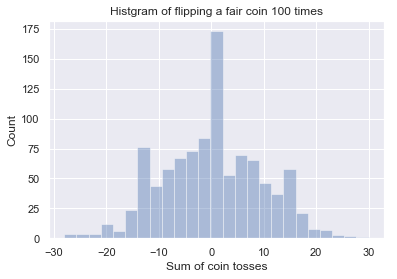

In [12]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

In [13]:
# Next, simulate 1000 coin tosses, 1000 times
k = 1000
sim_tosses, sim_total = flip_coin(1000, 1000)

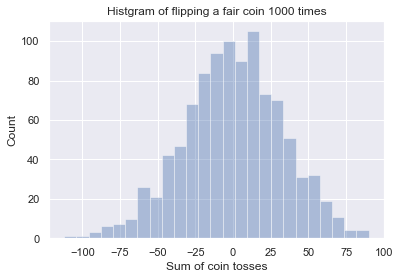

In [14]:
sns.distplot(sim_total, kde=False)
plt.title("Histgram of flipping a fair coin {} times".format(k))
plt.xlabel("Sum of coin tosses")
plt.ylabel("Count")
plt.show()

Using probability theory, we can determine the bounds of the sum of these coin tosses, namely, that the probability of $|S_k| \ge 4\sqrt{k}$ is smaller than $2x10^{-8}$.

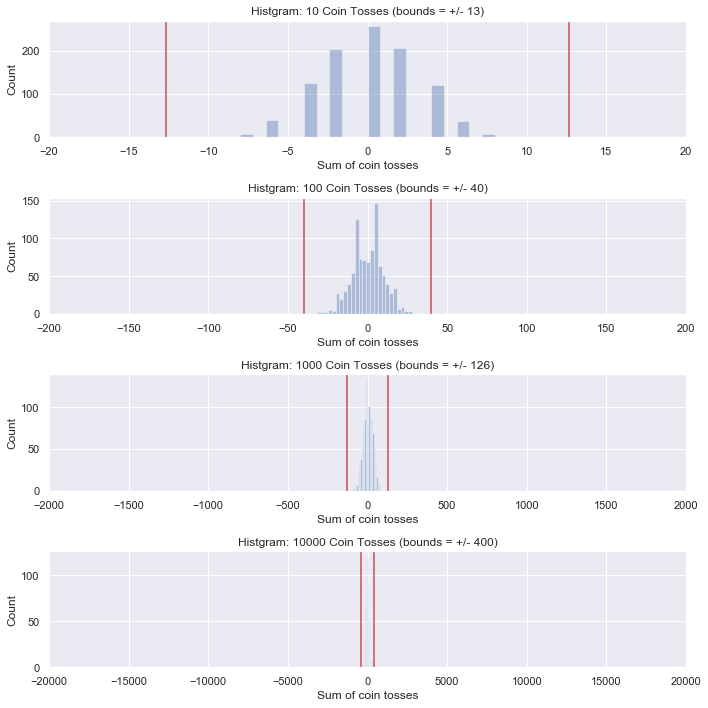

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(10,10))

for i in range(1,5):
    k = 10**i
    sim_tosses, sim_total = flip_coin(k, 1000)
    bounds = 4 * np.sqrt(k)
    sns.distplot(sim_total, kde=False, ax=ax[i-1])
    ax[i-1].set_xlim([-k-1*k, k+1*k])
    ax[i-1].axvline(x=bounds, c='r')
    ax[i-1].axvline(x=-1*bounds, c='r')
    ax[i-1].set_title("Histgram: {} Coin Tosses (bounds = +/- {:.0f})".format(k, bounds))
    ax[i-1].set_xlabel("Sum of coin tosses")
    ax[i-1].set_ylabel("Count")
plt.tight_layout()

#### Summary

Coin toss experiments were simulated using ```numpy```, with heads and tails assigned values, $x_h = 1$ and $x_t = -1$, each occuring with an equal probability of $1/2$. The sum of $k$ coin tosses, $S_k = x_1 + x_2 + ... + x_k$, converges around zero and is almost always within the range $[-4\sqrt{k}, +4\sqrt{k}]$.


## Statistics

Statistics allows us to infer the properties of underlying events given data that was generated by a stochastic process. For example, we can use statistics to decide whether a coin is biased given that we have gotten 570 heads out of 1000 total coin flips. The thinking goes like this:

* Assume we have an unbiased coin
* Using probability theory, determine the probability of getting 570 heads (430 tails)
* If the probability is very small, within a threshold, we can reject with confidence the hypothesis that the coin is fair

This means we draw conclusion about systems and signals by analyzing real-world data.

#### The 3 Card Problem

A card is drawn from a hat containing three cards:

* One with Red on both sides
* One with Blue on both sides
* One with Red on one side and Blue on the other

If the other side of the card has a different color, you win. Otherwise, I win.

This is a great example where intuition may lead you to believe that you have a 50:50 chance of winning. Why? If the face up card is red, then the other side is either red or blue. But wait....

When we run a monte carlo simulation, we observe something unexpected.

In [16]:
cards = ['bb', 'rr', 'br']
winners = []
n = 100

for i in range(n):
    card = np.random.randint(0, 3)
    # You win
    if cards[card] == 'br':
        winners.append(0)
    # I win
    else:
        winners.append(1)

my_score = np.sum(winners)
your_score = n - my_score
print("I win {} | You win {}".format(my_score, your_score))

I win 67 | You win 33


In fact, the two sides have the same color twice as often as they have different colors. As we see, you are twice as likely to lose as you are to win. 

#### Estimating the Probability of Heads

Estimate the probability that n flips of a fair coin result in between k1 to k2 heads (repeated for m trials).

In [17]:
def num_heads(m, n):
    flips = np.random.randint(0, 2, size=(m, n))
    return np.sum(flips, axis=1)

In [18]:
def estimate_probability(n, k1, k2, m):
    num = num_heads(m, n)
    result = num[(num >= k1) & (num < k2)]
    return len(result) / m

In [19]:
estimate_probability(100,45,55,1000)

0.689

## Sets

Sets are a collection of elements. They may be explicitly defined with specific items or more broadly defined using a category.

If an element x is in set A, we call it a member. This is denoted $x \in A$. An element not in A is denoted $y \not\in A$. You can also say the opposite, namely, that A contains x, $A \supseteq x$.

When dealing with sets, order and repetition do not matter.

**Special Sets**

* Empty set: $\varnothing$ - for all x, x is not a member of empty set ($\forall x, x\not\in\varnothing$)
* Universal set: $\Omega$ - for all x, x is a member of universal set ($\forall x, x\in\Omega$)

#### Defining a Set & Basic Properties

In Python, elements of a set must be immutable and hashable. Lists cannot be elements of a set.

In [20]:
set1 = {1, 2}
set2 = set({1, 2})

set1, set2

({1, 2}, {1, 2})

In [21]:
empty = set()

empty

set()

In [22]:
not empty

True

In [23]:
languages = set(["javascript", "python", "c"])

In [24]:
not languages

False

In [25]:
"python" in languages

True

In [26]:
"spanish" in languages

False

In [27]:
len(languages)

3

In [28]:
sorted(languages)

['c', 'javascript', 'python']

In [29]:
languages.remove("c")
languages

{'javascript', 'python'}

#### Common Sets


* $C$ = set of all complex numbers
* $R$ = set of all real numbers
* $I$ = set of all imaginary numbers
* $Q$ = set of all rational numbers
* $Z$ = set of all integers
* $N$ = set of all natural numbers (>= 0)
* 

We say that $N \in Z \in Q \in R \in C$ and $I \in C$.

#### Sets within Sets

* Specify a set within a universe: $N = \{x \in Z | x \ge 0\}$ or $P = \{x \in N | x > 0\}$
* Specify a solution to an equation: $\{x \in R | x^2 = 1\} = \{-1, 1\}$ or $\{x \in R | x^2 = -1\} = \varnothing$

#### Integer Intervals

* $\{m,...,n\} = \{i \in Z | m \le i \le n\} $
* By convention, $[n] = \{1,...n\}$

#### Real Intervals

* $[a,b] = \{x \in R | a \le x \le b\}$
* $[a,b) = \{x \in R | a \le x < b\}$
* $(a,b] = \{x \in R | a < x \le b\}$
* $(a,b) = \{x \in R | a < x < b\}$

#### Visualizing Sets

Number of common elements:


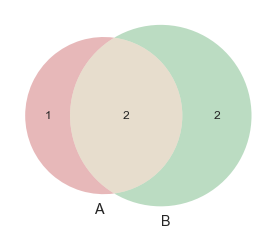

In [30]:
A = set({1, 2, 3})
B = set({1, 3, -1, 4})

print("Number of common elements:")
venn.venn2([A,B], set_labels=('A','B'))
plt.show()

#### Set Relations

* Equality: same elements in both sets
* Intersection: at least one element is shared between sets
* Disjoint: no elements are shared between sets
* Subset: all elements of one set are also in the other set
* Strict Subset: if all elements of one set are also in the other set and the sets are not equal ($\subset$)

#### Other Notation

* Relation between element and set, i.e. x in A: $x \in A$ 
* Relation between sets, i.e. A subset of B: $A \subset B$

In [31]:
zero = set({0})
a = set({0, 1})

zero.issubset(a)

True

In [32]:
a.issuperset(a)

True

In [33]:
zero < a # alternatively

True

#### Set Size

The size of a set $|A|$, also known as its cardinality, is equal to the number of elements in the set. The size of an integer interval $|\{m,...,n\}| = n-m+1$.

In general, $|A \cup B| = |A| + |B| - |A\cap B|$ - this is called the Principle of Inclusion-Exclusion. Note that for disjoint unions $|A\cap B| = 0$ and the size becomes a simple sum of the sizes of the two individual sets. In the case of three sets, $|A \cup B \cup C| = |A| + |B| + |C| - |A \cap B| - |A \cap C| - |B \cap C| + |A \cap B \cap C|$.

Another helpful identity is: $|\Omega| = |A| + |A^c|$. Sometimes it is easier to calculate the size of the complement and subtract it from the universal set to find the size of the set in question.

#### Set Operations

* Complement: all elements in universal set $\Omega$ that are not in A ($A^c$)
* Union: all elements in A, B or both ($A \cup B$)
* Intersection: all elements in both A and B ($A \cap B$)
* Difference: all elements in A that are not in B ($A - B$)
* Symmetric Difference: all elements in either set but not both sets ($A \Delta $B)

#### Helpful Identities

* De Morgan's Law: $(A \cup B)^c = A^c \cap B^c$ and $(A \cap B)^c = A^c \cup B^c$
* Involution: $(A^c)^c = A$

In [34]:
A = set([1, 2])
B = set([2, 3])
A | B, A.union(B) # 2 different notations for union

({1, 2, 3}, {1, 2, 3})

In [35]:
A & B, A.intersection(B) # 2 different notations for intersection

({2}, {2})

In [36]:
A - B, A.difference(B) # 2 different notations for difference

({1}, {1})

In [37]:
A ^ B, A.symmetric_difference(B) # 2 different notations for symmetric difference

({1, 3}, {1, 3})

In [38]:
A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
U = A|B|{7, 10} # create a universal set containing the union of A and B plus a few extra elements
U

{-6, 0, 1, 2, 3, 4, 5, 7, 8, 9, 10}

#### Finding the primes

In [39]:
k = 100
I = set(range(2,k))

for j in range(2, int(np.sqrt(k)) + 1):
    multiples = set(range(2*j, k, j))
    I -= multiples

print(I)

{2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97}


#### Tuples

When working with tuples, both order and repetition matter (unlike sets). Thus $(a, b, c) \ne (b, a, c)$ and $(b) \ne (b, b)$. A tuple with n elements is called an n-tuple; one special n-tuple is a two-element tuple called a 2-tuple or ordered pair: $(5, 7)$. Sequences are a shorthand version of tuples without the parentheses and commas.

#### Cartesian Products & Powers

The cartesian product $A \times B$ is the set of ordered pairs (tuples) consisting of elements in $A$ and $B$. This is denoted: $A \times B = \{(a,b): a\in A, b\in B\}$. The cartesian product of a set with itself is called a cartesian power, $A \times A \times A = A^n$. A special case is $A \times A$, or $A^2$, which is known as a cartesian square.

Using the cartesian product we construct our familiar n-dimension space, for example $R^2 = R \times R = \{(x,y): x,y\in R\}$, the Cartesian Plane. The cartesian product also defines shapes within this n-dimensional space, for example if $A = [0,2]$ and $B = [1,5]$, then $A \times B$ is a rectangle with sides $[0,2]$ in the x-direction and $[1,5]$ in the y-direction.

In general the size of a cartesian product is the product of the individual set sizes: $|A \times B \times C| = |A| \cdot |B| \cdot |C|$. Likewise, $|A^n| = |A|^n$.

Cartesian products, or any sequences for that matter, can be visualized as trees, with all nodes at any level having the same degree. For example, $\{a,b\} \times \{1,2,3\}$ could be drawn as a tree with $a$ and $b$ splitting from the root node and $1$, $2$ and $3$ splitting off from both $a$ and $b$. The size of this product would be $2 \cdot 3 = 6$. Trees can then be generalized to directed acyclic graphs where we want to know the number of paths from source to a destination. This can be determined by recursively counting the number of paths from each node to the destination.

Cartesian powers are important when dealing with binary strings or n-bit strings. Length-n binary strings are denoted as $\{0,1\}^n$:
* $\{0,1\}^0 = \varnothing$ - size 1
* $\{0,1\}^1 = 0, 1$ - size 2
* $\{0,1\}^2 = 00, 01, 10, 11$ - size 4
* $\{0,1\}^3 = 000, 001, 010, 100, 011, 101, 110, 111$ - size 8
* $\{0,1\}^n = 0...0, ..., 1...1$ - size $2^n$

Likewise, cartesian powers enable us to calculate the size of power sets, $P(S)$, which are the collection of all subsets of S. For example $|P(\{a,b\})| = \{0,1\}^{|2|}$ or more generally, $|P(S)| = \{0,1\}^{|S|}$.

In [40]:
# manually perform cartesian product
A = set(['w','v'])
B = set([3,2,0])

c = set()
for a in A:
    for b in B:
        c.add((b,a))

print(c)

{(3, 'v'), (3, 'w'), (0, 'v'), (2, 'w'), (2, 'v'), (0, 'w')}


In [41]:
for i in itertools.product(A,B):
    print(i)

('w', 0)
('w', 2)
('w', 3)
('v', 0)
('v', 2)
('v', 3)


In [42]:
# cartesian powers
print(set(itertools.product({1, 2, 3}, repeat=2)))

{(1, 2), (3, 2), (1, 3), (3, 3), (3, 1), (2, 1), (2, 3), (2, 2), (1, 1)}


In [43]:
len(set(itertools.product({1, 2, 3}, repeat=2)))

9

#### Permutations

A permutation is a specific ordering of a set of objects. It is often of interest to know how many different permutations are possible given certain boundary conditions. In general, given $n$ objects, there number of permutations is equal to $n \cdot (n-1) \; \cdot \; ... \cdot \; 2 \cdot 1 = n!$. Factorials grow very quickly; Stirling's Approximation is often used to roughly determine values of large factorials: $n! \approx \sqrt{2\pi n}\frac{n}{e}^n$

#### Partial Permutations

A partial permutation is the collection of $k$ out of $n$ objects or a so-called $k$ permutation of $n$. In other words we are arranging a subset of the objects, rather than all of them. The number of partial permutations is equal to $n \cdot (n-1) \; \cdot ... \cdot \; (n-k+1) = \frac{n!}{(n-k)!} = n^{\underline{k}}$. This is called the $k^{th}$ falling power of $n$ or $P(n,k)$. 

Ex: How many 2-permutations are there for the set {5,6,7,8}? 

Ans: $\frac{4!}{(4-2)!} = 4^{\underline{2}} = 4 \cdot 3 = 12$

Ex: Suppose you need to arrange a list of 6 books, with 2 books from each subject listed consecutively.

* Subject A: 4 books to choose from
* Subject B: 5 books to choose from
* Subject C: 6 books to choose from

Ans: The total number of ways to decide the order of 3 subjects is $3!$. Once we determine the order, we determine the pairs of books from each subject, or the 2-permutations. Thus, the total number of permutations is $3! \cdot 4^{\underline{2}} \cdot 5^{\underline{2}} \cdot 6^{\underline{2}}$.

#### k-Subsets & Binomial Coefficients

A subset of size $k$ is called a $k$-subset. The collection of $k$-subsets of $[n] = {1,2,...,n}$ is denoted ${n \choose k}$. This can also be interpreted as the collection of $n$-bit sequences with $k$ ones.

* ${[3] \choose 1} = \{\{1\}, \{2\}, \{3\}\} = 100, 010, 001$
* ${[3] \choose 2} = \{\{1,2\}, \{1,3\}, \{2,3\}\} = 110, 101, 011$ - Notice that we are considering only 3 pairs here, not 6, because when dealing with $n$-bit sequences, order does not matter. For example $\{\{1,2\} = \{\{2,1\} = 110$.

A natural question we might ask is: what is the cardinality of $n$-bit sequences with $k$ ones? This number is known as the binomial coefficient and is denoted $|{[n] \choose k}| = {n \choose k} = \frac{n^{\underline{k}}}{k!} = \frac{n!}{k!(n-k)!}$.

Ex: ${4 \choose 2} = |{4 \choose 2}| = |\{0011,0101,0110,1001,1010,1100\}| = \frac{4!}{2!(4-2)!} = 6$

We can think of this binomial coefficient as:

* First, choose the location of the first 1 $\Longrightarrow$ 4 choices
* Second, choose the location of the second 1 $\Longrightarrow$ 3 choices
* Since choosing location 1 and then 3 is the same as 3 and then 1, we are basically double counting and therefore need to divide by 2 $\Longrightarrow \frac{4\cdot3}{2} = 6$

A few simple binomial coefficients:

* ${n \choose 0} = \frac{n!}{0!(n-0)!} = 1 \Longrightarrow$ All zero sequence
* ${n \choose n} = \frac{n!}{n!(n-n)!} = 1 \Longrightarrow$ All ones sequence
* ${n \choose 1} = \frac{n!}{1!(n-1)!} = \frac{n\cdot(n-1)\cdot(n-2)\cdot...}{(n-1)\cdot(n-2)\cdot...} = n \Longrightarrow$ All sequences with a single one
* ${n \choose 2} = \frac{n!}{2!(n-2)!} = \frac{n(n-1)}{2} \Longrightarrow$ All sequences with two ones. 1st location - n ways - 2nd location - (n-1) ways - but each sequence is chosen twice.

One shortcut to calculating binomial coefficients by hand is to notice that ${n \choose k} = {n \choose n-k}$. If $k$ is greater than $n/2$, it's probably easier to calculate ${n \choose n-k}$.

Ex: ${12 \choose 9} = \frac{12!}{9!(12-9)!} = \frac{12!}{9!3!} = \frac{12 \cdot 11 \cdot 10}{3 \cdot 2 \cdot 1} = 220$

Ex: Out of a pool of 4 boys and 3 girls, how many ways can you choose 2 boys and 2 girls?

Ans: ${4 \choose 2}{3 \choose 2} = 6 \cdot 3 = 18$.

Ex: Assume Joe and Mary cannot be grouped together. Now how many ways can you choose a committee of 4 people?

Ans: Since the sets are disjoint, the total number of ways are committees with Joe + committees with Mary + committees without Joe or Mary. The new pool without Joe or Mary is $7 - 2 = 5$ people $\Longrightarrow {5 \choose 3} + {5 \choose 3} + {5 \choose 4} = 10 + 10 + 5 = 25$

**Properties of Binomial Coefficients**

* ${n \choose k} = {n \choose n-k} $
* ${n \choose k} = \frac{n}{k} \cdot {n-1 \choose k-1}$ (recursive definition)
* $\sum_{i=0}^{n} {n \choose i} = 2^n$

#### Pascal's Identity

\begin{equation*}
{n+1 \choose k} = {n \choose k} + {n \choose k-1}
\end{equation*}

From this identity we can construct a triangle of ever larger binomial coefficients by taking the sum of preceeding coefficients. 

<table>
    <tr>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            2
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            3
        </td>
        <td>
            3
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            4
        </td>
        <td>
            6
        </td>
        <td>
            4
        </td>
        <td>
            1
        </td>
    </tr>
    <tr>
        <td>
            1
        </td>
        <td>
            5
        </td>
        <td>
            10
        </td>
        <td>
            10
        </td>
        <td>
            5
        </td>
        <td>
            1
        </td>
    </tr>
</table>

#### The Binomial Theorem

\begin{equation*}
(a + b)^n = \sum_{i=0}^{n} {n \choose i} a^{n-i} b^i
\end{equation*}

Pascal's triangle conveniently generates coefficients for binomials, or polynomials with two variables. For example:

$(a + b)^4 = a^4 + 4a^3b + 6a^2b^2 + 4ab^3 + b^4 = {4 \choose 0}a^4 + {4 \choose 1}a^3b + {4 \choose 2}a^2b^2 + {4 \choose 3}ab^3 + {4 \choose 4}b^4$

In other words, the coefficients represent the number of ways that we can select a certain number of $a$s and $b$s.

**Examples of Polynomial Coefficients**

Ex: What is the coefficient of $x^2$ in $(1+x)^7$?

Ans: 

\begin{equation*}
(1 + x)^7 = \sum_{i=0}^{7} {7 \choose i} 1^{7-i} x^i
\end{equation*}

We are interested in the coefficient when $i=2$.

\begin{equation*}
{7 \choose 2} x^2 = 21x^2
\end{equation*}

Ex: What is the coefficient of $x^3$ in $(3 + 2x)^5$?

Ans: 

\begin{equation*}
(3 + 2x)^5 = \sum_{i=0}^{5} {5 \choose i} 3^{5-i} (2x)^i
\end{equation*}

We are interested in the coefficient when $i=3$.

\begin{equation*}
{5 \choose 3} \cdot 3^2 \cdot 2x^3 = 720x^3
\end{equation*}


#### Binomial Distribution

\begin{equation*}
\sum_{i=0}^{n} {n \choose i} p^{n-i} (1 - p)^i = (p + (1 - p))^n = 1^n = 1
\end{equation*}

#### Multinomial Coefficients

We can generalize the binomial theorem to determine the number of sequences consisting of larger alphabets, rather than only binary digits. In the case of the ternary alphabet $\{1,2,3\}$, we would be interested in constructing a sequence with $k_1 1s$, $k_2 2s$ and $k_3 3s$ where $k_1 + k_2 + k_3 = n$. First, we would select the location of the $k_1 1s \Longrightarrow  {n \choose k_1}$. Next we would select the location of the $k_2 2s \Longrightarrow  {n - k_1 \choose k_2}$. This automatically determines the location of the remaining $k_3 3s$.

\begin{equation*}
{n \choose k_1} {n - k_1 \choose k_2} = \frac{n!}{k_1! \cdot (n-k_1)!} \cdot \frac{(n - k_1)!}{k_2! \cdot (n-k_1-k_2)!} = \frac{n!}{k_1! \cdot k_2! \cdot k_3!} \Longrightarrow {n \choose k_1,k_2,k_3}
\end{equation*}

Ex: How many sequences can be constructed using the digits $\{1,2,3,4\}$ with the frequencies $\{1,4,4,2\}$.

Ans: ${11 \choose 1,4,4,2} = 34,650$



#### More Applications of Combinatorics

**Counting Sums**

Writing a positive quantity as a sum of positive integers can be thought of as a decision as to which terms to partition into groups. This in turn can be determined using combinatorics.

Ex: Write 5 as a sum of 3 positive integers (order matters).

Ans: $|\{3+1+1, 2+1+2, 2+2+1, 1+3+1, 1+2+2, 1+1+3\}| = {4 \choose 2}$ - We have 4 inter-item gaps in which we can place two addition operations. This results in a sum of 3 items.

As a visual:

* $3+1+1 = \cdot \; \cdot \; \cdot \; | \; \cdot \; | \; \cdot$
* $2+1+2 = \cdot \; \cdot \; | \; \cdot \; | \; \cdot \; \cdot$
* $2+2+1 = \cdot \; \cdot \; | \;\cdot  \; \cdot \; | \; \cdot$ 
* $1+3+1 = \cdot \; | \; \cdot \; \cdot \; \cdot \; | \; \cdot$ 
* $1+2+2 = \cdot \; | \; \cdot \; \cdot \; | \; \cdot \; \cdot$ 
* $1+1+3 = \cdot \; | \; \cdot \; | \; \cdot \; \cdot \; \cdot$

In general, there are ${n-1 \choose k-1}$ ways to write $n$ as a sum of $k$ positive integers.

What if we wanted to extend this to writing a quantity as a sum of any number of positive integers, rather than the same number of integers every time? Then, there are $2^{n-1}$ ways, since for every gap between items we can either add or not add.

Ex: How many ways can you write 3 as the sum of positive integers? 

Ans: $|\{3, 1+2, 2+1, 1+1+1\}| = 2^{3-1} = 2^2 = 4$